In [1]:
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('Tabular_playground_sep_2022').getOrCreate()
spark

In [2]:
headers = True
inferschema = True


In [3]:
df_pyspark = spark.read.option("header",headers)\
    .option("inferSchema",inferschema)\
        .csv("D:/Kaggle Projects/Tabular Playground - Sep 2022/tabular-playground-series-sep-2022/train.csv")

In [4]:
df_pyspark.printSchema()

root
 |-- row_id: integer (nullable = true)
 |-- date: timestamp (nullable = true)
 |-- country: string (nullable = true)
 |-- store: string (nullable = true)
 |-- product: string (nullable = true)
 |-- num_sold: integer (nullable = true)



In [5]:
df_pyspark.show()

+------+-------------------+-------+----------+--------------------+--------+
|row_id|               date|country|     store|             product|num_sold|
+------+-------------------+-------+----------+--------------------+--------+
|     0|2017-01-01 00:00:00|Belgium|KaggleMart|Kaggle Advanced T...|     663|
|     1|2017-01-01 00:00:00|Belgium|KaggleMart|Kaggle Getting St...|     615|
|     2|2017-01-01 00:00:00|Belgium|KaggleMart|  Kaggle Recipe Book|     480|
|     3|2017-01-01 00:00:00|Belgium|KaggleMart|Kaggle for Kids: ...|     710|
|     4|2017-01-01 00:00:00|Belgium|KaggleRama|Kaggle Advanced T...|     240|
|     5|2017-01-01 00:00:00|Belgium|KaggleRama|Kaggle Getting St...|     187|
|     6|2017-01-01 00:00:00|Belgium|KaggleRama|  Kaggle Recipe Book|     158|
|     7|2017-01-01 00:00:00|Belgium|KaggleRama|Kaggle for Kids: ...|     267|
|     8|2017-01-01 00:00:00| France|KaggleMart|Kaggle Advanced T...|     610|
|     9|2017-01-01 00:00:00| France|KaggleMart|Kaggle Getting St

In [6]:
# Date wrongly shown as timestamp, convert to proper date
from pyspark.sql.functions import *
df_pyspark= df_pyspark.withColumn("date",to_date("date"))
df_pyspark= df_pyspark.withColumn("mmyy_date",date_format("date","yyyy-MM"))
df_pyspark.show()

+------+----------+-------+----------+--------------------+--------+---------+
|row_id|      date|country|     store|             product|num_sold|mmyy_date|
+------+----------+-------+----------+--------------------+--------+---------+
|     0|2017-01-01|Belgium|KaggleMart|Kaggle Advanced T...|     663|  2017-01|
|     1|2017-01-01|Belgium|KaggleMart|Kaggle Getting St...|     615|  2017-01|
|     2|2017-01-01|Belgium|KaggleMart|  Kaggle Recipe Book|     480|  2017-01|
|     3|2017-01-01|Belgium|KaggleMart|Kaggle for Kids: ...|     710|  2017-01|
|     4|2017-01-01|Belgium|KaggleRama|Kaggle Advanced T...|     240|  2017-01|
|     5|2017-01-01|Belgium|KaggleRama|Kaggle Getting St...|     187|  2017-01|
|     6|2017-01-01|Belgium|KaggleRama|  Kaggle Recipe Book|     158|  2017-01|
|     7|2017-01-01|Belgium|KaggleRama|Kaggle for Kids: ...|     267|  2017-01|
|     8|2017-01-01| France|KaggleMart|Kaggle Advanced T...|     610|  2017-01|
|     9|2017-01-01| France|KaggleMart|Kaggle Getting

In [7]:
df_pyspark.createOrReplaceTempView("view")
q1 = spark.sql("SELECT count(distinct country)as country_count,count(distinct store) as store_count,count(distinct product) as product_count from view")
q1.show()
#Only 6 countries, 2 stores per country and 4 types of product

+-------------+-----------+-------------+
|country_count|store_count|product_count|
+-------------+-----------+-------------+
|            6|          2|            4|
+-------------+-----------+-------------+



In [8]:
q2=spark.sql("select mmyy_date, sum(num_sold) from view group by mmyy_date order by sum(num_sold) desc")
q2.show()
#Most sales come in 2020, with year end showing most sales

+---------+-------------+
|mmyy_date|sum(num_sold)|
+---------+-------------+
|  2020-12|       375704|
|  2020-01|       368039|
|  2020-02|       334729|
|  2020-11|       330612|
|  2020-10|       328959|
|  2020-08|       323076|
|  2020-07|       318682|
|  2018-12|       318563|
|  2020-03|       315641|
|  2017-12|       306066|
|  2020-09|       305244|
|  2018-05|       304079|
|  2018-01|       302617|
|  2020-06|       301888|
|  2019-12|       299179|
|  2020-05|       297769|
|  2018-03|       292882|
|  2019-01|       292424|
|  2018-04|       289285|
|  2017-01|       281848|
+---------+-------------+
only showing top 20 rows



In [9]:
q3 = spark.sql("select country, store, sum(num_sold) from view group by country, store order by sum(num_sold) desc")
q3.show()
#order of country sales fro top: Germany, Belgium, France, Italy, Spain, Poland
#KaggleMart also consistently sells more than KaggleRama

+-------+----------+-------------+
|country|     store|sum(num_sold)|
+-------+----------+-------------+
|Germany|KaggleMart|      2068327|
|Belgium|KaggleMart|      2064078|
| France|KaggleMart|      1865517|
|  Italy|KaggleMart|      1635044|
|  Spain|KaggleMart|      1487691|
| Poland|KaggleMart|       996597|
|Germany|KaggleRama|       718088|
|Belgium|KaggleRama|       716972|
| France|KaggleRama|       646802|
|  Italy|KaggleRama|       566048|
|  Spain|KaggleRama|       515547|
| Poland|KaggleRama|       344948|
+-------+----------+-------------+



In [10]:
q4 = spark.sql("select country, store, product, sum(num_sold) from view group by country, store, product order by sum(num_sold) desc")
q4.show()
# Product of choice is also consistent among country

+-------+----------+--------------------+-------------+
|country|     store|             product|sum(num_sold)|
+-------+----------+--------------------+-------------+
|Germany|KaggleMart|Kaggle for Kids: ...|       641419|
|Belgium|KaggleMart|Kaggle for Kids: ...|       638919|
|Germany|KaggleMart|Kaggle Advanced T...|       593793|
|Belgium|KaggleMart|Kaggle Advanced T...|       593014|
| France|KaggleMart|Kaggle for Kids: ...|       578045|
| France|KaggleMart|Kaggle Advanced T...|       536155|
|  Italy|KaggleMart|Kaggle for Kids: ...|       506848|
|Germany|KaggleMart|Kaggle Getting St...|       475851|
|Belgium|KaggleMart|Kaggle Getting St...|       475774|
|  Italy|KaggleMart|Kaggle Advanced T...|       470350|
|  Spain|KaggleMart|Kaggle for Kids: ...|       460830|
| France|KaggleMart|Kaggle Getting St...|       429665|
|  Spain|KaggleMart|Kaggle Advanced T...|       426981|
|  Italy|KaggleMart|Kaggle Getting St...|       376232|
|Germany|KaggleMart|  Kaggle Recipe Book|       

In [11]:
q5 = spark.sql("select mmyy_date as dates,country,store,product, sum(num_sold) as sales from view group by mmyy_date, country,store,product order by mmyy_date,country,store,product")
df_pandas = q5.toPandas()
df_pandas

,dates,country,store,product,sales
0,2017-01,Belgium,KaggleMart,Kaggle Advanced Techniques,13345
1,2017-01,Belgium,KaggleMart,Kaggle Getting Started,9807
2,2017-01,Belgium,KaggleMart,Kaggle Recipe Book,8429
3,2017-01,Belgium,KaggleMart,Kaggle for Kids: One Smart Goose,13589
4,2017-01,Belgium,KaggleRama,Kaggle Advanced Techniques,4697
...,...,...,...,...,...
2299,2020-12,Spain,KaggleMart,Kaggle for Kids: One Smart Goose,14668
2300,2020-12,Spain,KaggleRama,Kaggle Advanced Techniques,4465
2301,2020-12,Spain,KaggleRama,Kaggle Getting Started,3851
2302,2020-12,Spain,KaggleRama,Kaggle Recipe Book,3127


In [12]:
q6 = spark.sql("select mmyy_date as date,country, sum(num_sold) as sales from view group by mmyy_date,country order by mmyy_date,country")
df_pandas = q6.toPandas()
df_pandas

,date,country,sales
0,2017-01,Belgium,60995
1,2017-01,France,53673
2,2017-01,Germany,62180
3,2017-01,Italy,45419
4,2017-01,Poland,19618
...,...,...,...
283,2020-12,France,61556
284,2020-12,Germany,62316
285,2020-12,Italy,64007
286,2020-12,Poland,62709


In [13]:
df_pandas=df_pandas.pivot(index="date",columns="country",values="sales")
df_pandas

country,Belgium,France,Germany,Italy,Poland,Spain
date,,,,,,
2017-01,60995,53673,62180,45419,19618,39963
2017-02,51691,45511,51980,37913,16240,32803
2017-03,56451,49788,56891,41459,17639,36082
2017-04,56571,49575,58225,41959,18008,35849
2017-05,57573,51673,58052,41830,18045,36262
2017-06,53948,47087,54093,39388,17130,33465
2017-07,56441,49007,55359,40120,17091,34831
2017-08,55265,48769,54349,40770,17313,35402
2017-09,53011,46052,53220,38596,16456,33612


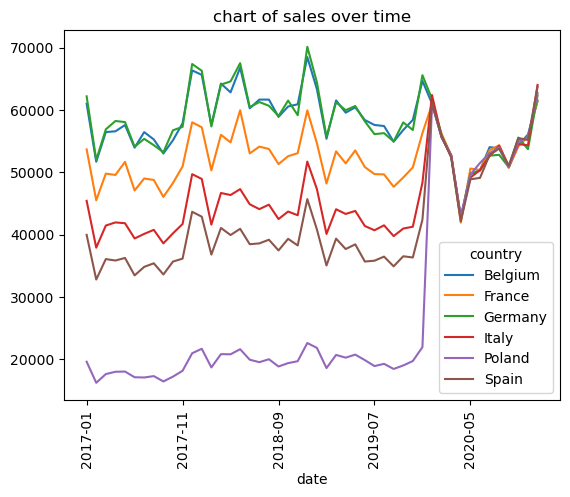

In [14]:
ax = df_pandas.plot.line(rot=90,title="chart of sales over time")
# Belgium and Germany historically have highest sales, 
# but all countries (especially Poland) saw a spike from 2020 and all countries have similar sales

In [15]:
q7 = spark.sql("select mmyy_date as date,country,store,sum(num_sold) as sales from view group by mmyy_date,country,store order by mmyy_date,country,store")
df_pandas = q7.toPandas()
df_pandas=df_pandas.pivot(index="date",columns=["country","store"],values="sales")
df_pandas

country    Belgium                France               Germany             \
store   KaggleMart KaggleRama KaggleMart KaggleRama KaggleMart KaggleRama   
date                                                                        
2017-01      45170      15825      39762      13911      46212      15968   
2017-02      38402      13289      33839      11672      38487      13493   
2017-03      41873      14578      37024      12764      42196      14695   
2017-04      41999      14572      36830      12745      43255      14970   
2017-05      42652      14921      38332      13341      43077      14975   
2017-06      40024      13924      34883      12204      40093      14000   
2017-07      41994      14447      36322      12685      41112      14247   
2017-08      41034      14231      36247      12522      40289      14060   
2017-09      39338      13673      34148      11904      39507      13713   
2017-10      40997      14148      35918      12366      42043      14701   
2017-11      43018      14846      37874      13061      42543      14738   
2017-12      49261      17083      43079      14937      49796      17564   
2018-01      48747      16871      42295      14920      49190      17092   
2018-02      42756      14834      37414      12894      42525      14828   
2018-03      47686      16541      41785      14228      47509      16550   
2018-04      46704      16113      40676      14115      48018      16557   
2018-05      49510      17265      44571      15379      50201      17296   
2018-06      44669      15591      39391      13635      44776      15665   
2018-07      45706      15952      40311      13802      45519      15744   
2018-08      45820      15837      39910      13829      45049      15613   
2018-09      43703      15180      38133      13176      43805      15217   
2018-10      44966      15584      39130      13451      45597      15905   
2018-11      45178      15725      39248      13814      43908      15248   
2018-12      50606      17870      44594      15332      52058      18066   
2019-01      46891      16440      40557      14109      47884      16551   
2019-02      41118      14253      35794      12408      41338      14349   
2019-03      45610      15918      39603      13753      45386      15837   
2019-04      44292      15267      38228      13201      44351      15607   
2019-05      44753      15666      39774      13729      45109      15520   
2019-06      43303      15074      37803      13033      43123      15041   
2019-07      42872      14719      36806      12904      41555      14560   
2019-08      42659      14758      36907      12757      41798      14479   
2019-09      40757      14145      35463      12208      40664      14281   
2019-10      42084      14695      36596      12567      43199      14801   
2019-11      43340      15066      37709      13076      42093      14691   
2019-12      47879      16780      41737      14548      48677      16897   
2020-01      45356      15661      45354      15536      45896      15862   
2020-02      41340      14234      41684      14496      41548      14400   
2020-03      38988      13606      39110      13576      38992      13499   
2020-04      31452      10849      31074      10855      31760      11067   
2020-05      36942      12752      37458      13136      37126      12671   
2020-06      37435      12867      37402      12978      37412      12855   
2020-07      40053      13974      39673      13858      39236      13434   
2020-08      40002      13847      40236      14100      39203      13593   
2020-09      37835      13032      37690      13027      37713      13096   
2020-10      40290      14041      40112      14069      41173      14399   
2020-11      41582      14473      41316      14350      39963      13740   
2020-12      45432      15955      45715      15841      46363      15953   

country      Italy                Poland                 Spain          

<AxesSubplot:title={'center':'chart of sales over time at country/store level'}, xlabel='date'>

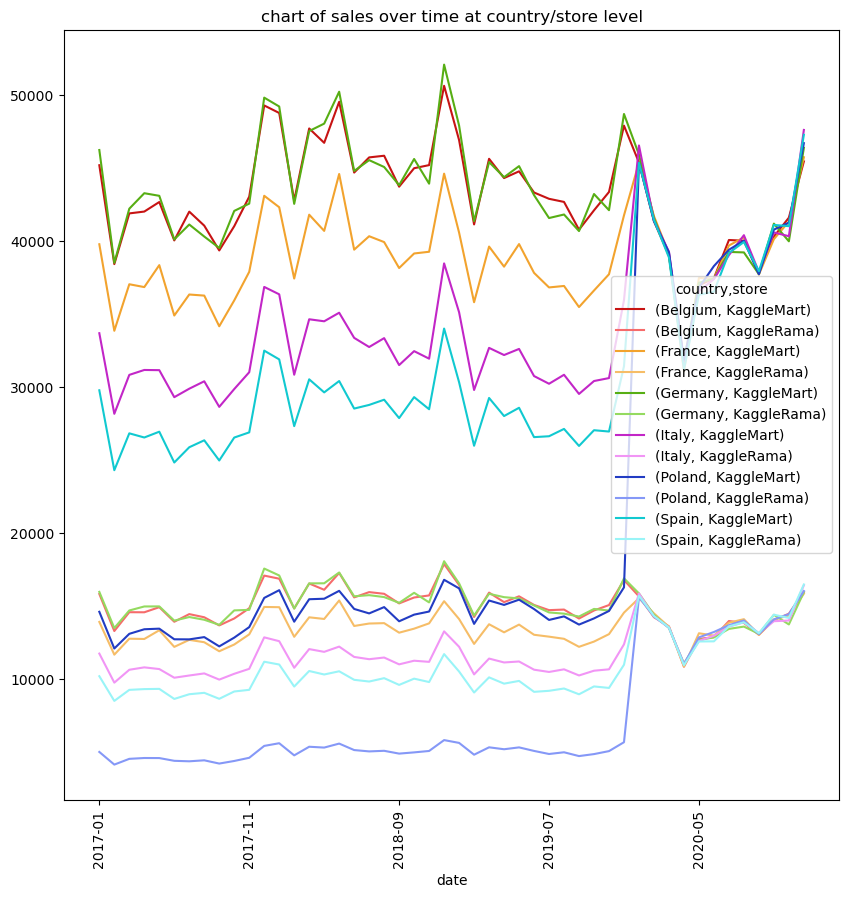

In [16]:
df_pandas.plot.line(rot=90,title="chart of sales over time at country/store level",figsize = (10,10),sharey = True,
color=['#C71313','#F66B6B',"#F2A32E","#F6BD67","#57AE14","#94DA60","#C226C7","#F195F5","#223CC3","#8598F7","#11C9D0","#99F4F7"])
# KaggleMart(deep color) consistently have higher sales than KaggleRama(light color)
# Problem of 2020 equilization remains even at store level

In [17]:
q8 = spark.sql("select mmyy_date as date, product,sum(num_sold) as sales from view group by mmyy_date,product")
df_pandas=q8.toPandas()
df_pandas=df_pandas.pivot(index="date",columns="product",values="sales")
df_pandas

product,Kaggle Advanced Techniques,Kaggle Getting Started,Kaggle Recipe Book,Kaggle for Kids: One Smart Goose
date,,,,
2017-01,83101,61150,52736,84861
2017-02,76480,47348,42798,69512
2017-03,87840,50042,44884,75544
2017-04,89930,50507,43221,76529
2017-05,88816,54065,42082,78472
2017-06,77112,55185,38388,74426
2017-07,72152,62521,40293,77883
2017-08,64986,66896,41631,78355
2017-09,57532,66341,41899,75175


<AxesSubplot:title={'center':'chart of sales over time at product level'}, xlabel='date'>

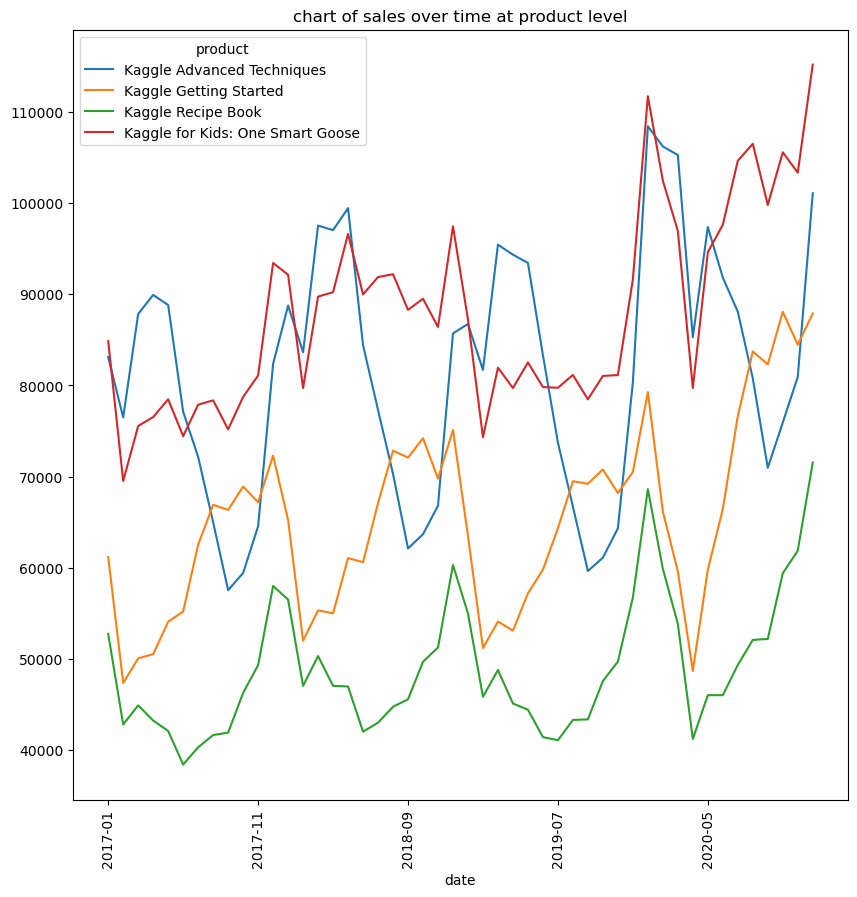

In [18]:
df_pandas.plot.line(rot=90,title="chart of sales over time at product level",figsize = (10,10))
#sales at product level seems relatively unaffected by 2020 equilization

In [19]:
q9 = spark.sql("select mmyy_date as date,store, product,sum(num_sold) as sales from view group by mmyy_date,store,product")
df_pandas=q9.toPandas()
df_pandas=df_pandas.pivot(index="date",columns=["store","product"],values="sales")
df_pandas

store               KaggleMart                                    KaggleRama  \
product Kaggle Getting Started Kaggle Recipe Book Kaggle Advanced Techniques   
date                                                                           
2017-01                  45400              39162                      21447   
2017-02                  35123              31774                      19620   
2017-03                  37242              33340                      22661   
2017-04                  37513              32132                      23158   
2017-05                  40071              31284                      22871   
2017-06                  40923              28491                      19927   
2017-07                  46359              30031                      18529   
2017-08                  49646              30969                      16777   
2017-09                  49222              31092                      14748   
2017-10                  51196              34354                      15265   
2017-11                  49846              36699                      16496   
2017-12                  53563              42931                      21179   
2018-01                  48351              41966                      22968   
2018-02                  38627              34940                      21618   
2018-03                  41098              37438                      25221   
2018-04                  40912              34927                      24932   
2018-05                  45306              34836                      25601   
2018-06                  45022              31147                      21867   
2018-07                  49975              32032                      19883   
2018-08                  54105              33286                      17941   
2018-09                  53439              33860                      16078   
2018-10                  55290              36877                      16425   
2018-11                  51722              38014                      17209   
2018-12                  55751              44741                      22130   
2019-01                  47071              40807                      22427   
2019-02                  38066              33998                      21104   
2019-03                  40069              36184                      24582   
2019-04                  39544              33471                      24375   
2019-05                  42496              33008                      24073   
2019-06                  44328              30721                      21548   
2019-07                  47749              30485                      18969   
2019-08                  51606              32181                      17176   
2019-09                  51378              32179                      15297   
2019-10                  52534              35375                      15699   
2019-11                  50706              36965                      16701   
2019-12                  52353              42081                      20754   
2020-01                  58923              51079                      27620   
2020-02                  49180              44413                      27262   
2020-03                  44265              39930                      27096   
2020-04                  36182              30629                      22124   
2020-05                  44395              34159                      24948   
2020-06                  49412              34212                      23474   
2020-07                  56757              36686                      22653   
2020-08                  62087              38608                      20778   
2020-09                  61125              38774                      18338   
2020-10                  65362              44007                      19663   
2020-11                  62729              45988                      20763   


<AxesSubplot:title={'center':'chart of sales over time at store/product level'}, xlabel='date'>

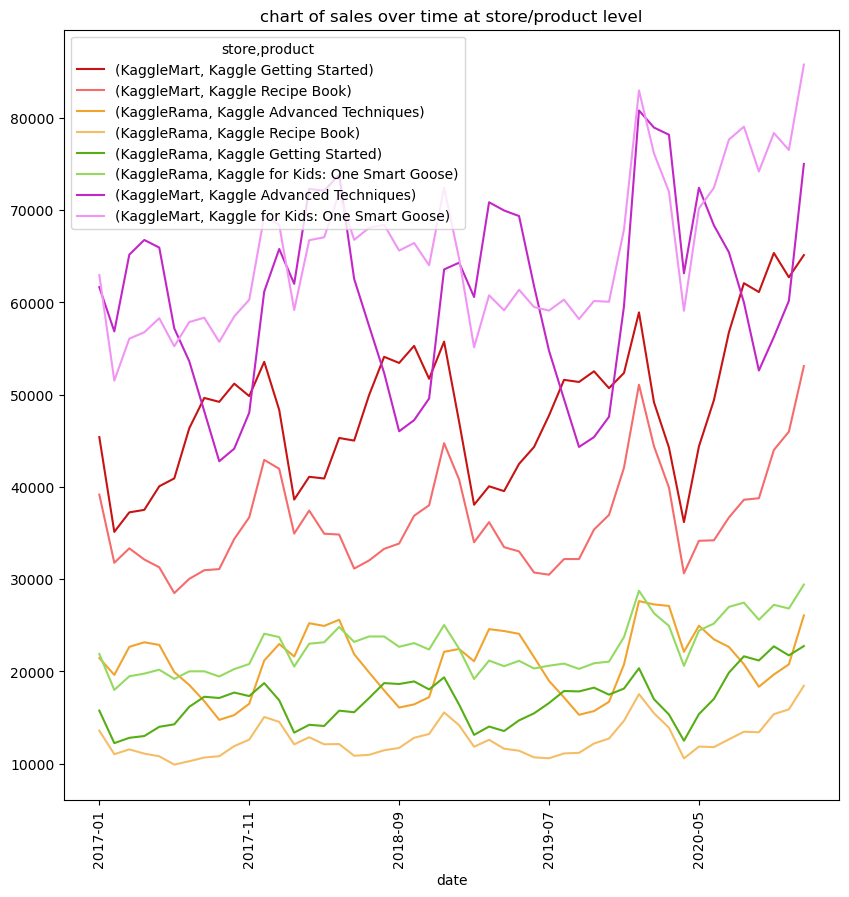

In [20]:
df_pandas.plot.line(rot=90,title="chart of sales over time at store/product level",figsize = (10,10),
color=['#C71313','#F66B6B',"#F2A32E","#F6BD67","#57AE14","#94DA60","#C226C7","#F195F5","#223CC3","#8598F7","#11C9D0","#99F4F7"])
#Still looks fine even after store gets added in

In [21]:
'''
Prediction plan:
1. Use median then prorate based on average sales
2. Use mean then prorate based on average sales
3. Use ARIMA

Explanation:
Based on the country/store level vizualization, it looks like data from 2020 onwards may have been reduced to median/mean on store level.
That would explain why lower performing countries suddenly get boosted while higher performing countries dropped in sales.

However, sales looks relatively normal at product level, hence ARIMA can be tested here.
'''

'\nPrediction plan:\n1. Use median then prorate based on average sales\n2. Use mean then prorate based on average sales\n3. Use ARIMA\n\nExplanation:\nBased on the country/store level vizualization, it looks like data from 2020 onwards may have been reduced to median/mean on store level.\nThat would explain why lower performing countries suddenly get boosted while higher performing countries dropped in sales.\n\nHowever, sales looks relatively normal at product level, hence ARIMA can be tested here.\n'

In [22]:
# Mean & Median
# Prepping data (2017-2019)
training = spark.sql("select mmyy_date as date,country, store,sum(num_sold) as sales from view where year(mmyy_date)<2020 group by mmyy_date,country, store order by mmyy_date,store, country")
df_training = training.toPandas()
df_training

,date,country,store,sales
0,2017-01,Belgium,KaggleMart,45170
1,2017-01,France,KaggleMart,39762
2,2017-01,Germany,KaggleMart,46212
3,2017-01,Italy,KaggleMart,33673
4,2017-01,Poland,KaggleMart,14605
...,...,...,...,...
427,2019-12,France,KaggleRama,14548
428,2019-12,Germany,KaggleRama,16897
429,2019-12,Italy,KaggleRama,12377
430,2019-12,Poland,KaggleRama,5679


In [23]:
# Finding Mean & Median at country level, it is a stright line, going into 2020

df_training_med= df_training.groupby(["store"]).agg(["median","mean"])
df_training_join = df_training.join(df_training_med, on = ["store"], how="left")
df_training_join.columns = ["date","country","store","total_sales","median_sales","mean_sales"]
df_training_join =df_training_join.drop(columns = ["date","country","total_sales"]).drop_duplicates()
df_training_join = df_training_join.sort_values(["store"]).reset_index(drop = True)
df_training_join

C:\Users\Tguan\AppData\Local\Temp\ipykernel_20164\3123176335.py:3: FutureWarning: ['date', 'country'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df_training_med= df_training.groupby(["store"]).agg(["median","mean"])
C:\Users\Tguan\AppData\Local\Temp\ipykernel_20164\3123176335.py:4: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left, 2 on the right)
  df_training_join = df_training.join(df_training_med, on = ["store"], how="left")


,store,median_sales,mean_sales
0,KaggleMart,35628.5,33584.574074
1,KaggleRama,12294.5,11649.064815


In [24]:
training2 = spark.sql("select country, store,product,sum(num_sold) as sales from view where year(mmyy_date)<2020 group by country, store,product order by store, country,product")
df_training2 = training2.toPandas()
df_training2

,country,store,product,sales
0,Belgium,KaggleMart,Kaggle Advanced Techniques,458211
1,Belgium,KaggleMart,Kaggle Getting Started,366653
2,Belgium,KaggleMart,Kaggle Recipe Book,274346
3,Belgium,KaggleMart,Kaggle for Kids: One Smart Goose,488161
4,France,KaggleMart,Kaggle Advanced Techniques,401119
5,France,KaggleMart,Kaggle Getting Started,320091
6,France,KaggleMart,Kaggle Recipe Book,239670
7,France,KaggleMart,Kaggle for Kids: One Smart Goose,427813
8,Germany,KaggleMart,Kaggle Advanced Techniques,459057
9,Germany,KaggleMart,Kaggle Getting Started,366820


In [25]:
#Finding product ratio for proration

df_training_prorate = df_training2.groupby(["store","product"]).agg("mean")
df_training_prorate_join = df_training2.drop(columns = ["country","sales"]).merge(df_training_prorate, how="left",on=["store","product"]).drop_duplicates()
df_training_prorate_join.columns = ["store","product","mean"]
df_training_prorate_join["mean"] = df_training_prorate_join["mean"].apply(lambda x: int(x))
df_training_prorate_join["ratio"]= df_training_prorate_join["mean"]/df_training_prorate_join.groupby(["store"])["mean"].transform("sum")
df_training_prorate_join = df_training_prorate_join.sort_values(["store","product"]).reset_index(drop=True)
df_training_prorate_join

,store,product,mean,ratio
0,KaggleMart,Kaggle Advanced Techniques,349078,0.288723
1,KaggleMart,Kaggle Getting Started,278933,0.230706
2,KaggleMart,Kaggle Recipe Book,208963,0.172833
3,KaggleMart,Kaggle for Kids: One Smart Goose,372069,0.307738
4,KaggleRama,Kaggle Advanced Techniques,121209,0.289031
5,KaggleRama,Kaggle Getting Started,96721,0.230637
6,KaggleRama,Kaggle Recipe Book,72359,0.172545
7,KaggleRama,Kaggle for Kids: One Smart Goose,129075,0.307788


In [26]:
# Calculating prorated means and medians for 2020
import pandas as pd
dft= df_training_prorate_join.merge(df_training_join,how="left",on=["store"])
dft["prorated_median"],dft["prorated_mean"]=dft["median_sales"]*dft["ratio"],dft["mean_sales"]*dft["ratio"]
dft

,store,product,mean,ratio,median_sales,mean_sales,prorated_median,prorated_mean
0,KaggleMart,Kaggle Advanced Techniques,349078,0.288723,35628.5,33584.574074,10286.752020,9696.624478
1,KaggleMart,Kaggle Getting Started,278933,0.230706,35628.5,33584.574074,8219.694742,7748.149570
2,KaggleMart,Kaggle Recipe Book,208963,0.172833,35628.5,33584.574074,6157.794425,5804.535779
3,KaggleMart,Kaggle for Kids: One Smart Goose,372069,0.307738,35628.5,33584.574074,10964.258812,10335.264247
4,KaggleRama,Kaggle Advanced Techniques,121209,0.289031,12294.5,11649.064815,3553.485875,3366.935400
5,KaggleRama,Kaggle Getting Started,96721,0.230637,12294.5,11649.064815,2835.570851,2686.709393
6,KaggleRama,Kaggle Recipe Book,72359,0.172545,12294.5,11649.064815,2121.349771,2009.983406
7,KaggleRama,Kaggle for Kids: One Smart Goose,129075,0.307788,12294.5,11649.064815,3784.093502,3585.436616


In [27]:
# Prepping test set
testing = spark.sql("select mmyy_date as date, store,product, sum(num_sold) as sales from view where year(mmyy_date)=2020 group by mmyy_date,store,product order by mmyy_date,store,product")
df_testing = testing.toPandas()
df_testing

,date,store,product,sales
0,2020-01,KaggleMart,Kaggle Advanced Techniques,80814
1,2020-01,KaggleMart,Kaggle Getting Started,58923
2,2020-01,KaggleMart,Kaggle Recipe Book,51079
3,2020-01,KaggleMart,Kaggle for Kids: One Smart Goose,82983
4,2020-01,KaggleRama,Kaggle Advanced Techniques,27620
...,...,...,...,...
91,2020-12,KaggleMart,Kaggle for Kids: One Smart Goose,85784
92,2020-12,KaggleRama,Kaggle Advanced Techniques,26066
93,2020-12,KaggleRama,Kaggle Getting Started,22747
94,2020-12,KaggleRama,Kaggle Recipe Book,18444


In [28]:
# Joining prediction with actual
df_test_input = df_testing.merge(dft,how="left",on=["product","store"])
df_test_input

,date,store,product,sales,mean,ratio,median_sales,mean_sales,prorated_median,prorated_mean
0,2020-01,KaggleMart,Kaggle Advanced Techniques,80814,349078,0.288723,35628.5,33584.574074,10286.752020,9696.624478
1,2020-01,KaggleMart,Kaggle Getting Started,58923,278933,0.230706,35628.5,33584.574074,8219.694742,7748.149570
2,2020-01,KaggleMart,Kaggle Recipe Book,51079,208963,0.172833,35628.5,33584.574074,6157.794425,5804.535779
3,2020-01,KaggleMart,Kaggle for Kids: One Smart Goose,82983,372069,0.307738,35628.5,33584.574074,10964.258812,10335.264247
4,2020-01,KaggleRama,Kaggle Advanced Techniques,27620,121209,0.289031,12294.5,11649.064815,3553.485875,3366.935400
...,...,...,...,...,...,...,...,...,...,...
91,2020-12,KaggleMart,Kaggle for Kids: One Smart Goose,85784,372069,0.307738,35628.5,33584.574074,10964.258812,10335.264247
92,2020-12,KaggleRama,Kaggle Advanced Techniques,26066,121209,0.289031,12294.5,11649.064815,3553.485875,3366.935400
93,2020-12,KaggleRama,Kaggle Getting Started,22747,96721,0.230637,12294.5,11649.064815,2835.570851,2686.709393
94,2020-12,KaggleRama,Kaggle Recipe Book,18444,72359,0.172545,12294.5,11649.064815,2121.349771,2009.983406


In [29]:
from sklearn.metrics import mean_absolute_percentage_error as mape
median_mape= mape(df_test_input["sales"],df_test_input["prorated_median"])
mean_mape=mape(df_test_input["sales"],df_test_input["prorated_mean"])
print("Median MAPE =",median_mape)
print("Mean MAPE =",mean_mape)
'''
Median MAPE = 0.8475092709949221
Mean MAPE = 0.8558868521073405
'''

Median MAPE = 0.8475092709949221
Mean MAPE = 0.8558868521073405


'\nMedian MAPE = 0.8475092709949221\nMean MAPE = 0.8558868521073405\n'

# Using ARIMA on product level

ARIMA has 3 components. Auto-regression(p),Integration(d),Moving Average(q). They can primarily be identified via visualization.
There are also tests to confirm the level of those 3 components. I will do both.

From the visualization of sales at store/product level, they are:
Non-stationary
Has multiplicative seasonality
Conclusion: Use ARIMA[0,1,1]

In [30]:
'''
We now create tests to see whether this is correct.
Because all lines follow the same pattern at store/product level, data for 1 store/product should represent all available
'''
# Prepping data 
# Taking KaggleMart, Kaggle getting Started
q10 = spark.sql("select mmyy_date as date, store, product, sum(num_sold) as sales from view where store='KaggleMart' and product='Kaggle Getting Started' and year(mmyy_date)<2020 group by mmyy_date,store,product order by mmyy_date")
df_data=q10.toPandas()
df_data

,date,store,product,sales
0,2017-01,KaggleMart,Kaggle Getting Started,45400
1,2017-02,KaggleMart,Kaggle Getting Started,35123
2,2017-03,KaggleMart,Kaggle Getting Started,37242
3,2017-04,KaggleMart,Kaggle Getting Started,37513
4,2017-05,KaggleMart,Kaggle Getting Started,40071
5,2017-06,KaggleMart,Kaggle Getting Started,40923
6,2017-07,KaggleMart,Kaggle Getting Started,46359
7,2017-08,KaggleMart,Kaggle Getting Started,49646
8,2017-09,KaggleMart,Kaggle Getting Started,49222
9,2017-10,KaggleMart,Kaggle Getting Started,51196


In [31]:
# Augmented Dickey Fuller Test to test stationarity
from statsmodels.tsa.stattools import adfuller
adf = adfuller(df_data["sales"])
print("t-stat:",adf[0])
print("p-value:",adf[1])
print(adf[4])
'''
t-stat: -1.7627308819779144
p-value: 0.3991153647793705
{'1%': -3.7238633119999998, '5%': -2.98648896, '10%': -2.6328004}
At 5% significance, p-value is above 0.05, accept null hypothesis and time series is non-stationary
'''

t-stat: -1.7627308819779144
p-value: 0.3991153647793705
{'1%': -3.7238633119999998, '5%': -2.98648896, '10%': -2.6328004}


"\nt-stat: -1.7627308819779144\np-value: 0.3991153647793705\n{'1%': -3.7238633119999998, '5%': -2.98648896, '10%': -2.6328004}\nAt 5% significance, p-value is above 0.05, accept null hypothesis and time series is non-stationary\n"

d:\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


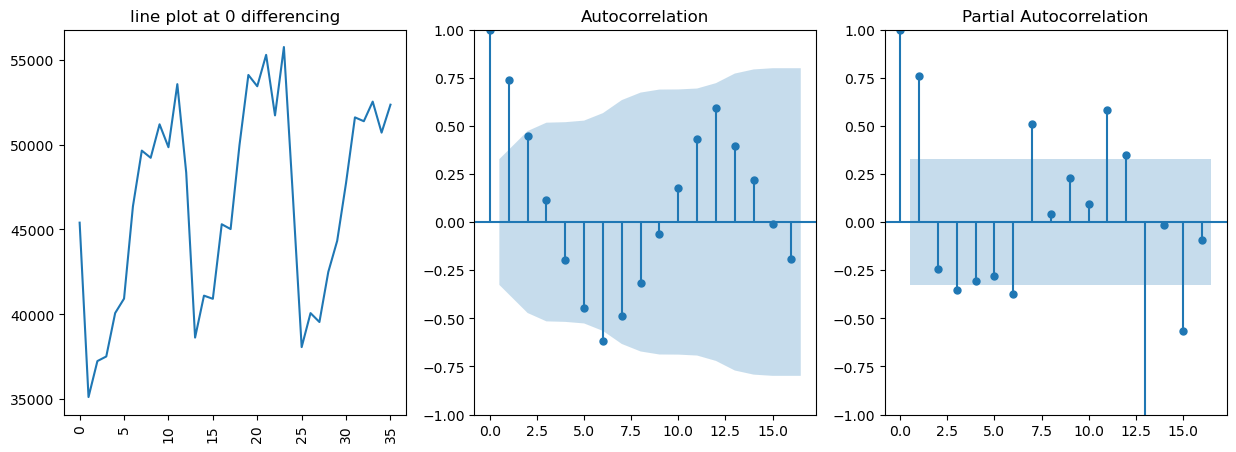

In [32]:
# We start differencing, starting from 0 or no differencing
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import matplotlib.pyplot as plt
fig,ax = plt.subplots(1,3, figsize=(15,5))
df_data["sales"].plot.line(rot=90,title="line plot at 0 differencing",ax=ax[0])
plot_acf(df_data["sales"], ax=ax[1]) #for MA
plot_pacf(df_data["sales"],ax=ax[2]) #for AR
plt.show()

d:\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


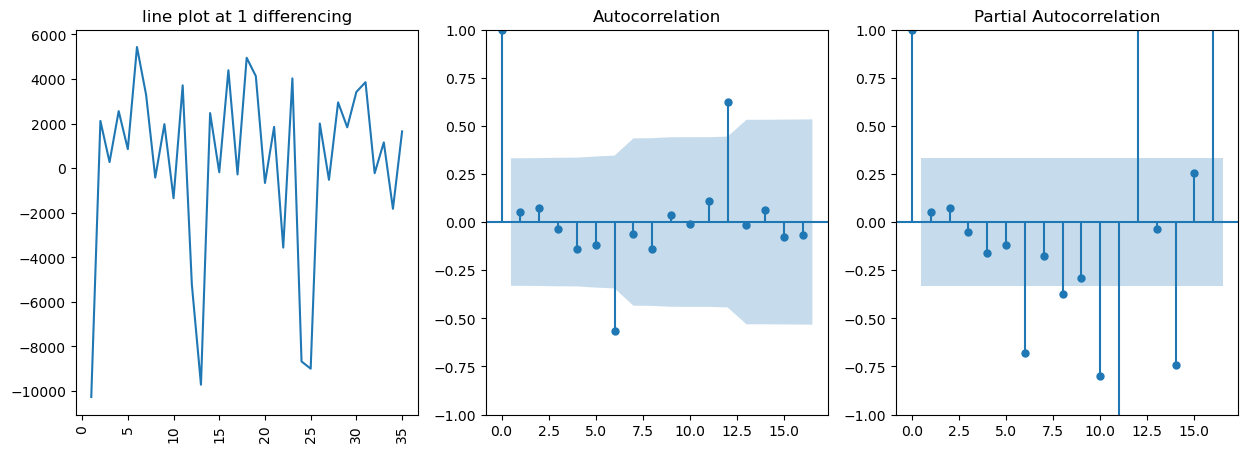

In [33]:
# At 1st order differencing
df_data["1diff"] = df_data["sales"].diff()
fig,ax2 = plt.subplots(1,3, figsize=(15,5))
df_data["1diff"].plot.line(rot=90,title="line plot at 1 differencing",ax=ax2[0])
plot_acf(df_data["1diff"].dropna(), ax=ax2[1])
plot_pacf(df_data["1diff"].dropna(),ax=ax2[2])
plt.show()

d:\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


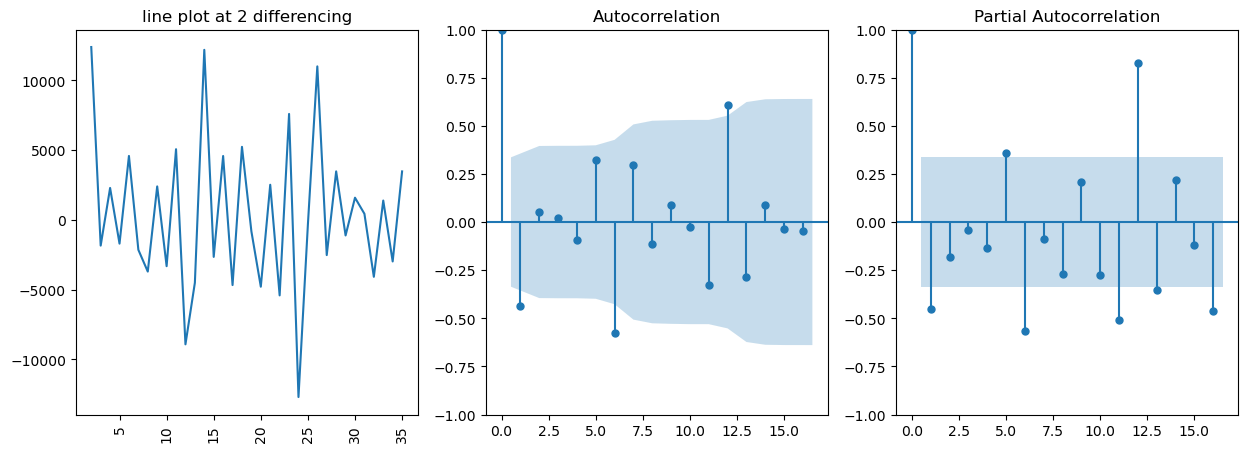

In [34]:
# At 2nd order differencing
df_data["2diff"] = df_data["sales"].diff().diff()
fig,ax3 = plt.subplots(1,3, figsize=(15,5))
df_data["2diff"].plot.line(rot=90,title="line plot at 2 differencing",ax=ax3[0])
plot_acf(df_data["2diff"].dropna(), ax=ax3[1])
plot_pacf(df_data["2diff"].dropna(),ax=ax3[2])
plt.show()

Comments:
At 1st order differencing, line chart starts showing stationarity with occasional negative plunges
however both pacf and acf charts only shows strong correlation at lag=0, which is itself and lag = 6

At 2nd order differencing, line chart starts showing stationarity with balanced differencing
both pacf and acf shows moderate correlation at lag=1 and lag=6

Hence, we can go either ARIMA[0,1,0],ARIMA[6,1,6],ARIMA[1,2,1] or ARIMA[6,2,6].

We can experiment around by creating these 4 models then check for their AIC or BIC. Whichever lowest will be the best.


In [35]:
# Create sample ARIMA model
from statsmodels.tsa.arima.model import ARIMA

model1=ARIMA(df_data["sales"],order=(0,1,0)).fit()
model1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  sales   No. Observations:                   36
Model:                 ARIMA(0, 1, 0)   Log Likelihood                -341.343
Date:                Mon, 06 Feb 2023   AIC                            684.686
Time:                        15:56:07   BIC                            686.242
Sample:                             0   HQIC                           685.223
                                 - 36                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.683e+07   3.51e+06      4.797      0.000    9.96e+06    2.37e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.10   Jarque-Bera (JB):                 9.98
Prob(Q):                              0.75   Prob(JB):                         0.01
Heteroskedasticity (H):               1.01   Skew:                            -1.26
Prob(H) (two-sided):                  0.99   Kurtosis:                         3.73
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [36]:
model2=ARIMA(df_data["sales"],order=(6,1,6)).fit()
model2.summary()


d:\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
d:\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  sales   No. Observations:                   36
Model:                 ARIMA(6, 1, 6)   Log Likelihood                -335.908
Date:                Mon, 06 Feb 2023   AIC                            697.816
Time:                        15:56:08   BIC                            718.036
Sample:                             0   HQIC                           704.796
                                 - 36                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2656      0.301     -0.884      0.377      -0.855       0.324
ar.L2         -0.1554      0.407     -0.382      0.703      -0.954       0.643
ar.L3         -0.2730      0.389     -0.701      0.483      -1.036       0.490
ar.L4         -0.1889      0.275     -0.687      0.492      -0.728       0.350
ar.L5         -0.2666      0.211     -1.261      0.207      -0.681       0.148
ar.L6         -0.9364      0.197     -4.750      0.000      -1.323      -0.550
ma.L1          0.2095      1.395      0.150      0.881      -2.524       2.943
ma.L2          0.2351      2.236      0.105      0.916      -4.147       4.617
ma.L3          0.3165      0.591      0.535      0.592      -0.842       1.475
ma.L4          0.2193      2.044      0.107      0.915      -3.786       4.225
ma.L5          0.1812      1.302      0.139      0.889      -2.370       2.732
ma.L6          0.9711      0.173      5.617      0.000       0.632       1.310
sigma2      5.815e+06   4.66e-07   1.25e+13      0.000    5.82e+06    5.82e+06
===================================================================================
Ljung-Box (L1) (Q):                   4.40   Jarque-Bera (JB):                 2.81
Prob(Q):                              0.04   Prob(JB):                         0.25
Heteroskedasticity (H):               0.66   Skew:                            -0.49
Prob(H) (two-sided):                  0.48   Kurtosis:                         3.97
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 8.07e+29. Standard errors may be unstable.
"""

In [37]:
model3=ARIMA(df_data["sales"],order=(1,2,1)).fit()
model3.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  sales   No. Observations:                   36
Model:                 ARIMA(1, 2, 1)   Log Likelihood                -332.847
Date:                Mon, 06 Feb 2023   AIC                            671.694
Time:                        15:56:08   BIC                            676.273
Sample:                             0   HQIC                           673.256
                                 - 36                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2742      0.275      0.997      0.319      -0.265       0.813
ma.L1         -0.8351      0.186     -4.493      0.000      -1.199      -0.471
sigma2      2.039e+07   6.88e-09   2.96e+15      0.000    2.04e+07    2.04e+07
===================================================================================
Ljung-Box (L1) (Q):                   1.19   Jarque-Bera (JB):                 1.21
Prob(Q):                              0.28   Prob(JB):                         0.55
Heteroskedasticity (H):               0.74   Skew:                            -0.41
Prob(H) (two-sided):                  0.63   Kurtosis:                         2.56
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.88e+31. Standard errors may be unstable.
"""

In [38]:
model4=ARIMA(df_data["sales"],order=(6,2,6)).fit()
model4.summary()

d:\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
d:\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  sales   No. Observations:                   36
Model:                 ARIMA(6, 2, 6)   Log Likelihood                -333.590
Date:                Mon, 06 Feb 2023   AIC                            693.180
Time:                        15:56:08   BIC                            713.022
Sample:                             0   HQIC                           699.947
                                 - 36                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3078     20.870     -0.015      0.988     -41.212      40.596
ar.L2          0.1215     24.707      0.005      0.996     -48.304      48.546
ar.L3          0.3379     19.128      0.018      0.986     -37.153      37.828
ar.L4          0.5500      9.700      0.057      0.955     -18.462      19.562
ar.L5          0.4550      2.964      0.154      0.878      -5.354       6.264
ar.L6         -0.5023     12.008     -0.042      0.967     -24.038      23.033
ma.L1         -0.1424     21.670     -0.007      0.995     -42.616      42.331
ma.L2         -0.3706     16.578     -0.022      0.982     -32.863      32.122
ma.L3         -0.4652      6.011     -0.077      0.938     -12.247      11.317
ma.L4         -0.5006      5.598     -0.089      0.929     -11.473      10.471
ma.L5         -0.3632     15.283     -0.024      0.981     -30.317      29.591
ma.L6          0.8538     20.322      0.042      0.966     -38.977      40.684
sigma2      3.694e+06      0.000   1.92e+10      0.000    3.69e+06    3.69e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.41   Jarque-Bera (JB):                 1.67
Prob(Q):                              0.52   Prob(JB):                         0.43
Heteroskedasticity (H):               0.82   Skew:                            -0.54
Prob(H) (two-sided):                  0.74   Kurtosis:                         2.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.72e+26. Standard errors may be unstable.
"""

ARIMA[1,2,1] has the lowest AIC/BIC. However, it seems like the AR segment does not seem to be significant. We make another model with ARIMA[0,2,1]

Edit:
ARIMA[0,2,1] has slightly better performance overall. Meaning we can expect sales changes to be negatively correlated after 1 month
i.e. Sales momentum starts to slow down after 1 month

In [39]:
model5=ARIMA(df_data["sales"],order=(0,2,1)).fit()
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  sales   No. Observations:                   36
Model:                 ARIMA(0, 2, 1)   Log Likelihood                -333.488
Date:                Mon, 06 Feb 2023   AIC                            670.976
Time:                        15:56:08   BIC                            674.029
Sample:                             0   HQIC                           672.017
                                 - 36                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.4741      0.110     -4.294      0.000      -0.691      -0.258
sigma2      2.045e+07   8.04e-10   2.54e+16      0.000    2.05e+07    2.05e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.95   Jarque-Bera (JB):                 0.23
Prob(Q):                              0.33   Prob(JB):                         0.89
Heteroskedasticity (H):               1.08   Skew:                            -0.07
Prob(H) (two-sided):                  0.90   Kurtosis:                         2.62
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.64e+32. Standard errors may be unstable.
"""

In [40]:
# Prepping full data
q11 = spark.sql("select mmyy_date as date, store, product, sum(num_sold) as sales from view where year(mmyy_date)<2020 group by mmyy_date,store,product order by mmyy_date,store,product")
full_df = q11.toPandas()
q12 = spark.sql("select mmyy_date as date, store, product, sum(num_sold) as sales from view where mmyy_date>'2019-11' group by mmyy_date,store,product order by mmyy_date,store,product")
df_testing=q12.toPandas()

In [41]:
# Predicting 2020 with ARIMA[1,2,1]
from statsmodels.tsa.arima.model import ARIMA

test = pd.DataFrame()

for s in set(full_df["store"]):
    for p in set(full_df["product"]):
        # Slicing training data
        training_data=full_df[(full_df["store"]==s) & (full_df["product"]==p)]
        model6=ARIMA(training_data["sales"],order=(0,2,1)).fit()

        # Slicing test data
        test_data=df_testing[(df_testing["store"]==s) & (df_testing["product"]==p)]
        test_data["pred"]=model6.predict()
        test=pd.concat([test,test_data],axis=0)

test=test[test["date"] !="2019-12"].sort_values(["date","store","product"])
test

d:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Tguan\AppData\Local\Temp\ipykernel_20164\1896447850.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data["pred"]=model6.predict()
d:\Anaconda3\lib\site-packag

,date,store,product,sales,pred
8,2020-01,KaggleMart,Kaggle Advanced Techniques,80814,105969.235005
9,2020-01,KaggleMart,Kaggle Getting Started,58923,72847.187057
10,2020-01,KaggleMart,Kaggle Recipe Book,51079,63766.928272
11,2020-01,KaggleMart,Kaggle for Kids: One Smart Goose,82983,99549.068171
12,2020-01,KaggleRama,Kaggle Advanced Techniques,27620,35493.451698
...,...,...,...,...,...
99,2020-12,KaggleMart,Kaggle for Kids: One Smart Goose,85784,74296.015933
100,2020-12,KaggleRama,Kaggle Advanced Techniques,26066,24566.844941
101,2020-12,KaggleRama,Kaggle Getting Started,22747,19413.735278
102,2020-12,KaggleRama,Kaggle Recipe Book,18444,16423.294834


In [42]:
# Testing data

arima_mape= mape(test["sales"],test["pred"])
print("ARIMA MAPE =",arima_mape)
#ARIMA MAPE = 0.1655134738883513

ARIMA MAPE = 0.1655134738883513


ARIMA MAPE is at 16%, significant improvement from mean and median. However, ARIMA predicts using prior periods without taking into account seasonality. To include seasonality, we use SARIMAX.

Looking back at the graphs at 2nd order differenciation, it is clear that number of periods(x) is 6. AR term can be up to 3 while MA term can be up to 2. As it is unclear whether there should be another level of differenciation, we will test both 0 and 1.

In [43]:
# Creating list of model performances
P=[0,1,2,3]
D=[0,1]
Q=[0,1,2]

for p in P:
    for d in D:
        for q in Q:
            model7=ARIMA(df_data["sales"],order=(1,2,1),seasonal_order=(p,d,q,6)).fit()
            print("model(0,2,1,",p,",",d,",",q,") AIC:",model7.aic," BIC:",model7.bic)

model(0,2,1, 0 , 0 , 0 ) AIC: 671.6943764592502  BIC: 676.2734580330987
model(0,2,1, 0 , 0 , 1 ) AIC: 673.3018531851333  BIC: 679.4072952835979


d:\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


model(0,2,1, 0 , 0 , 2 ) AIC: 674.0953559389397  BIC: 681.7271585620206
model(0,2,1, 0 , 1 , 0 ) AIC: 585.7435614278055  BIC: 589.7401749583311
model(0,2,1, 0 , 1 , 1 ) AIC: 579.2746381477114  BIC: 584.6034561884122


d:\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
d:\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


model(0,2,1, 0 , 1 , 2 ) AIC: 586.1111715360788  BIC: 592.7721940869549
model(0,2,1, 1 , 0 , 0 ) AIC: 673.2406645374596  BIC: 679.3461066359242
model(0,2,1, 1 , 0 , 1 ) AIC: 674.8980511520601  BIC: 682.529853775141


d:\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


model(0,2,1, 1 , 0 , 2 ) AIC: 676.0939410038657  BIC: 685.2521041515627
model(0,2,1, 1 , 1 , 0 ) AIC: 585.1425891036843  BIC: 590.4714071443851


d:\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
d:\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


model(0,2,1, 1 , 1 , 1 ) AIC: 580.8522177754681  BIC: 587.5132403263442
model(0,2,1, 1 , 1 , 2 ) AIC: 587.8293019450653  BIC: 595.8225290061165
model(0,2,1, 2 , 0 , 0 ) AIC: 674.2883451450018  BIC: 681.9201477680826
model(0,2,1, 2 , 0 , 1 ) AIC: 676.2847235942728  BIC: 685.4428867419698


d:\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


model(0,2,1, 2 , 0 , 2 ) AIC: 677.2730323485891  BIC: 687.9575560209023
model(0,2,1, 2 , 1 , 0 ) AIC: 586.0769078810896  BIC: 592.7379304319657
model(0,2,1, 2 , 1 , 1 ) AIC: 588.1057876380751  BIC: 596.0990146991263


d:\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


model(0,2,1, 2 , 1 , 2 ) AIC: 589.6789955740845  BIC: 599.004427145311
model(0,2,1, 3 , 0 , 0 ) AIC: 676.2766787736197  BIC: 685.4348419213167
model(0,2,1, 3 , 0 , 1 ) AIC: 678.0242343275852  BIC: 688.7087579998984


d:\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


model(0,2,1, 3 , 0 , 2 ) AIC: 679.2725844485763  BIC: 691.4834686455056
model(0,2,1, 3 , 1 , 0 ) AIC: 588.0330800897868  BIC: 596.0263071508381


d:\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


model(0,2,1, 3 , 1 , 1 ) AIC: 589.720607895967  BIC: 599.0460394671934


d:\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


model(0,2,1, 3 , 1 , 2 ) AIC: 591.5060418183875  BIC: 602.1636778997891


In [44]:
# Looks like ARIMA(0,2,1,0,1,1,6) is the best
model8=ARIMA(df_data["sales"],order=(0,2,1),seasonal_order=(0,1,1,6)).fit()
model8.summary()
# This means that only up to 6months worth of data can be used to predict.

d:\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                    
=======================================================================================
Dep. Variable:                           sales   No. Observations:                   36
Model:             ARIMA(0, 2, 1)x(0, 1, 1, 6)   Log Likelihood                -285.687
Date:                         Mon, 06 Feb 2023   AIC                            577.373
Time:                                 15:56:18   BIC                            581.370
Sample:                                      0   HQIC                           578.595
                                          - 36                                         
Covariance Type:                           opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9992      0.233     -4.289      0.000      -1.456      -0.543
ma.S.L6       -0.5284      0.209     -2.530      0.011      -0.938      -0.119
sigma2      3.808e+07   6.18e-09   6.16e+15      0.000    3.81e+07    3.81e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.15   Jarque-Bera (JB):                13.51
Prob(Q):                              0.70   Prob(JB):                         0.00
Heteroskedasticity (H):               0.35   Skew:                            -1.20
Prob(H) (two-sided):                  0.13   Kurtosis:                         5.42
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 7.26e+30. Standard errors may be unstable.
"""

In [45]:
#Testing the SARIMA model
test = pd.DataFrame()

for s in set(full_df["store"]):
    for p in set(full_df["product"]):
        # Slicing training data
        training_data=full_df[(full_df["store"]==s) & (full_df["product"]==p)]
        model9=ARIMA(training_data["sales"],order=(0,2,1),seasonal_order=(0,1,1,6)).fit()

        # Slicing test data
        test_data=df_testing[(df_testing["store"]==s) & (df_testing["product"]==p)]
        test_data["pred"]=model9.predict()
        test=pd.concat([test,test_data],axis=0)

test=test[test["date"] !="2019-12"].sort_values(["date","store","product"])
test

d:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
C:\Users\Tguan\AppData\Local\Temp\ipykernel_20164\3058486909.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

,date,store,product,sales,pred
8,2020-01,KaggleMart,Kaggle Advanced Techniques,80814,92657.937581
9,2020-01,KaggleMart,Kaggle Getting Started,58923,68326.232637
10,2020-01,KaggleMart,Kaggle Recipe Book,51079,59054.590649
11,2020-01,KaggleMart,Kaggle for Kids: One Smart Goose,82983,94730.962664
12,2020-01,KaggleRama,Kaggle Advanced Techniques,27620,32496.436656
...,...,...,...,...,...
99,2020-12,KaggleMart,Kaggle for Kids: One Smart Goose,85784,86595.439775
100,2020-12,KaggleRama,Kaggle Advanced Techniques,26066,26030.384609
101,2020-12,KaggleRama,Kaggle Getting Started,22747,23312.630015
102,2020-12,KaggleRama,Kaggle Recipe Book,18444,18911.929685


In [46]:
sarima_mape= mape(test["sales"],test["pred"])
print("SARIMA MAPE =",sarima_mape)
# SARIMA MAPE = 0.20322148754934868
# This is higher than ARIMA MAPE of 16% despite having lower AIC/BIC. There is an overfitting issue.

SARIMA MAPE = 0.20322148754934868


In [47]:
# running all models together at the same time
'''
p=[0,1,2,6]
d=[0,1,2]
q=[0,1,2,6]
P=[0,1,2]
D=[0,1,2]
Q=[0,1,2]
s=[0,6,12]

test = pd.DataFrame()
training = pd.DataFrame()
results = pd.DataFrame()
for p in [0,1,2]:
    for d in [0,1,2]:
        for q in [0,1,2]:
            for P in [0,1,2]:
                for D in [0,1,2]:
                    for Q in [0,1,2]:
                        for s in [0,6,12]:
                            if ((s!=0)&((P!=0)|(D!=0)|(Q!=0)))|((s==0)&((P==0)&(D==0)&(Q==0))):

                                for x in set(full_df["store"]):
                                    for y in set(full_df["product"]):
                                        # Slicing training data
                                        training_data=full_df[(full_df["store"]==x) & (full_df["product"]==y)]
                                        model10=ARIMA(training_data["sales"],order=(p,d,q),seasonal_order=(P,D,Q,s),enforce_stationarity=False).fit()
                                        forecast=model10.forcast(12)
                                        training_data=pd.concat([training_data,forecast],axis=1)
                                        training = pd.concat([training,training_data],axis=0)

                                        # Slicing test data
                                        test_data=df_testing[(df_testing["store"]==x) & (df_testing["product"]==y)]
                                        test_data["pred"]=model10.predict()
                                        test=pd.concat([test,test_data],axis=0)

                                        test=test[test["date"] !="2019-12"].sort_values(["date","store","product"])
                                        sarima_out_sample_mape= mape(test["sales"],test["pred"])
                                        sarima_in_sample_mape = mape(training["sales"],training["pred"])
                                print("SARIMA",p,d,q,P,D,Q,s, "in-sample MAPE =",sarima_in_sample_mape,"SARIMA",p,d,q,P,D,Q,s,"out-sample MAPE = ",sarima_out_sample_mape)
                                p_results = pd.DataFrame([["SARIMA"+" "+str(p)+" "+str(d)+" "+str(q)+" "+str(P)+" "+str(D)+" "+str(Q)+" "+str(s),sarima_in_sample_mape,sarima_out_sample_mape]],columns = ["ARIMA","in_sample","out_sample"])
                                results = pd.concat([results,p_results],axis=0)
results
'''
#SARIMA(0,0,0,0,0,2,12) best in-sample, in-sample (0.08846) out-sample (0.1608)
#SARIMA(0,0,0,0,0,2,6) best out-sample,in-sample (0.091) out-sample (0.1573) 
# Upon inspection of model via summary() it appears that our best out-sample variables are statistically insignificant,
# meaning this model should not be used. 
# We use ARIMA(0,2,1) for our final model

'\np=[0,1,2,6]\nd=[0,1,2]\nq=[0,1,2,6]\nP=[0,1,2]\nD=[0,1,2]\nQ=[0,1,2]\ns=[0,6,12]\n\ntest = pd.DataFrame()\ntraining = pd.DataFrame()\nresults = pd.DataFrame()\nfor p in [0,1,2]:\n    for d in [0,1,2]:\n        for q in [0,1,2]:\n            for P in [0,1,2]:\n                for D in [0,1,2]:\n                    for Q in [0,1,2]:\n                        for s in [0,6,12]:\n                            if ((s!=0)&((P!=0)|(D!=0)|(Q!=0)))|((s==0)&((P==0)&(D==0)&(Q==0))):\n\n                                for x in set(full_df["store"]):\n                                    for y in set(full_df["product"]):\n                                        # Slicing training data\n                                        training_data=full_df[(full_df["store"]==x) & (full_df["product"]==y)]\n                                        model10=ARIMA(training_data["sales"],order=(p,d,q),seasonal_order=(P,D,Q,s),enforce_stationarity=False).fit()\n                                        training_data["p

In [98]:
raw_test_Data = pd.read_csv("D:/Kaggle Projects/Tabular Playground - Sep 2022/tabular-playground-series-sep-2022/test.csv")
raw_train_data =pd.read_csv("D:/Kaggle Projects/Tabular Playground - Sep 2022/tabular-playground-series-sep-2022/train.csv")


In [114]:
test=pd.DataFrame()

for x in set(raw_train_data["country"]):
    for y in set(raw_train_data["store"]):
        for z in set(raw_train_data["product"]):
            # Slicing training data
            training_data=raw_train_data[(raw_train_data["country"]==x)&(raw_train_data["store"]==y) & (raw_train_data["product"]==z)].sort_values(["date"]).reset_index(drop=True)
            model11=ARIMA(training_data["num_sold"],order=(0,2,1)).fit()
            forecast = model11.forecast(365*2)
            forecast = forecast[365:].reset_index(drop=True)

            testing_data=raw_test_Data[(raw_test_Data["country"]==x)&(raw_test_Data["store"]==y) & (raw_test_Data["product"]==z)].sort_values(["date"]).reset_index(drop=True)
            testing_data= pd.concat([testing_data,forecast],axis=1)
            test = pd.concat([test,testing_data],axis=0)

        
test = test.sort_values("row_id")
test

,row_id,date,country,store,product,predicted_mean
0,70128,2021-01-01,Belgium,KaggleMart,Kaggle Advanced Techniques,613.693811
0,70129,2021-01-01,Belgium,KaggleMart,Kaggle Getting Started,393.945353
0,70130,2021-01-01,Belgium,KaggleMart,Kaggle Recipe Book,400.996158
0,70131,2021-01-01,Belgium,KaggleMart,Kaggle for Kids: One Smart Goose,496.050124
0,70132,2021-01-01,Belgium,KaggleRama,Kaggle Advanced Techniques,181.353421
...,...,...,...,...,...,...
364,87643,2021-12-31,Spain,KaggleMart,Kaggle for Kids: One Smart Goose,746.031242
364,87644,2021-12-31,Spain,KaggleRama,Kaggle Advanced Techniques,247.344316
364,87645,2021-12-31,Spain,KaggleRama,Kaggle Getting Started,177.621228
364,87646,2021-12-31,Spain,KaggleRama,Kaggle Recipe Book,151.023214


In [115]:
test.to_csv("D:/Kaggle Projects/Tabular Playground - Sep 2022/tabular-playground-series-sep-2022results.csv",index=False)